# Predicting Listing Gains in the Indian IPO Market Using TensorFlow

The purpose of this project is to build a deep learning classification model to determine if there will be listing gains for the Initial Public Offerings (IPO) in the Indian market. Listing gains are the percentage increase in the share price of a company from its IPO issue price on the day of listing.

The dataset will be using contains information on past IPOs in the Indian market and comes from [moneycontrol](https://www.moneycontrol.com/ipo/ipo-historic-table?classic=true).

## Data Dictionary

- `Date`: date when the IPO was listed
- `IPOName`: name of the IPO
- `Issue_Size`: size of the IPO issue, in INR Crores
- `Subscription_QIB`: number of times the IPO was subscribed by the QIB (Qualified Institutional Buyer) investor category
- `Subscription_HNI`: number of times the IPO was subscribed by the HNI (High Networth Individual) investor category
- `Subscription_RII`: number of times the IPO was subscribed by the RII (Retail Individual Investors) investor category
- `Subscription_Total`: total number of times the IPO was subscribed overall
- `Issue_Price`: the price in INR at which the IPO was issued
- `Listing_Gains_Percent`: is the percentage gain in the listing price over the issue price

## Libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

## Data Review

In [2]:
df = pd.read_csv("Indian_IPO_Market_Data.csv")
df.head()

,Date,IPOName,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Percent
0,03/02/10,Infinite Comp,189.80,48.44,106.02,11.08,43.22,165,11.82
1,08/02/10,Jubilant Food,328.70,59.39,51.95,3.79,31.11,145,-84.21
2,15/02/10,Syncom Health,56.25,0.99,16.60,6.25,5.17,75,17.13
3,15/02/10,Vascon Engineer,199.80,1.12,3.65,0.62,1.22,165,-11.28
4,19/02/10,Thangamayil,0.00,0.52,1.52,2.26,1.12,75,-5.20


In [3]:
df.tail()

,Date,IPOName,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Percent
314,26/08/22,Syrma SGS,840.13,42.42,7.13,2.84,15.59,220,42.30
315,06/09/22,Dreamfolks Serv,562.10,27.48,14.18,24.19,23.25,326,41.92
316,15/09/22,TMB,792.00,0.51,1.77,3.44,1.39,525,-3.15
317,26/09/22,Harsha Engineer,755.00,113.82,40.36,12.44,47.19,330,47.24
318,17/10/22,Electronics Mar,500.00,58.81,15.39,8.27,24.23,59,43.14


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   319 non-null    object 
 1   IPOName                319 non-null    object 
 2   Issue_Size             319 non-null    float64
 3   Subscription_QIB       319 non-null    float64
 4   Subscription_HNI       319 non-null    float64
 5   Subscription_RII       319 non-null    float64
 6   Subscription_Total     319 non-null    float64
 7   Issue_Price            319 non-null    int64  
 8   Listing_Gains_Percent  319 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 22.6+ KB


In [5]:
df.describe(include='all')

,Date,IPOName,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Percent
count,319,319,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
unique,287,319,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,16/08/21,Infinite Comp,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1192.859969,25.684138,70.091379,8.561599,27.447147,375.128527,4.742696
std,NaN,NaN,2384.643786,40.716782,142.454416,14.508670,48.772203,353.897614,47.650946
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-97.150000
25%,NaN,NaN,169.005000,1.150000,1.255000,1.275000,1.645000,119.000000,-11.555000
50%,NaN,NaN,496.250000,4.940000,5.070000,3.420000,4.930000,250.000000,1.810000
75%,NaN,NaN,1100.000000,34.635000,62.095000,8.605000,33.395000,536.000000,25.310000


Findings:
- There are 319 observations with 9 features.
- No missing value for any features.
- Two of the features are as `object` datatype, one is `int64`, and rest are `float64`.
- The `int64` is for the `issue price`, which means it's quoted in whole rupees (Rs) and no paise ('cent')
- The `top freq` of the `Date` is 4, which mean at most there are 4 companies went public in one day.
- The columns with `Subscription` are with datatype `float64` as they're the subscription rate, which is the ratio of the subscribers to the number of share offered.

## Data Exploration and Preprocessing

### Categorical Target Variable

Since we're aiming to build a classification model, but the target variable `Listing_Gains_Percent` is continous, so we'll need to convert it into a categorical variable. Thus, we'll create an additional variable `Listing_Gains_Profit`, which takes the binary values 1 when `Listing_Gains_Percent` is positive and 0 otherwise.

In [6]:
df['Listing_Gains_Profit'] = df['Listing_Gains_Percent'].apply(lambda x: 1 if x > 0 else 0)

In [7]:
df['Listing_Gains_Profit'].value_counts(normalize=True).round(4)

1    0.5455
0    0.4545
Name: Listing_Gains_Profit, dtype: float64

Around 55% of the IPOs listed at a profit, this is kinda balanced.

### Do we need date?

Lets explore now if we need the `Date` to be included in our model. We'll be doing this by ploting the percentage of value 1 in `Listing_Gains_Profit` with month and day grouping.

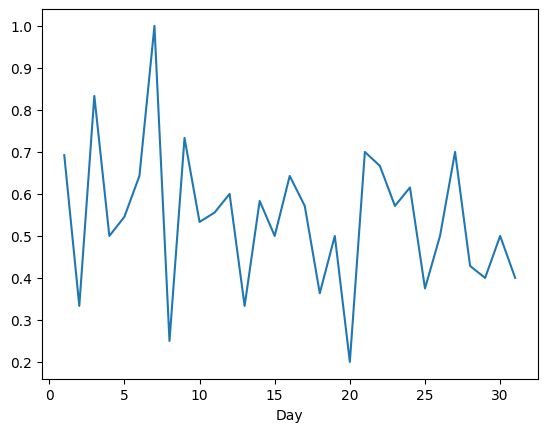

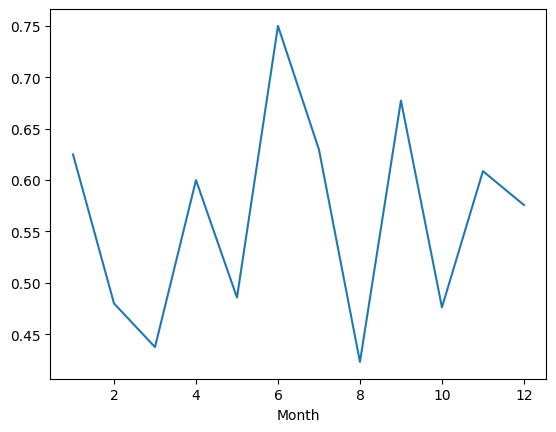

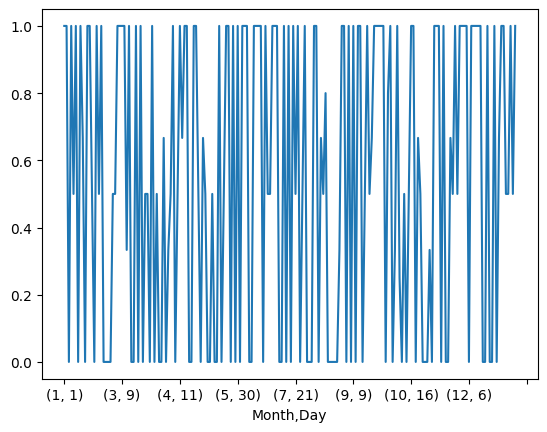

In [8]:
# convert to date format
df['Formatted_Date'] = pd.to_datetime(df['Date '], format="%d/%m/%y")

# split out the month and day
df['Month'] = df['Formatted_Date'].dt.month
df['Day'] = df['Formatted_Date'].dt.day

# Group by - percentage of value 1 in `Listing_Gains_Profit`
gains_by_day = df.groupby('Day')['Listing_Gains_Profit'].apply(lambda x: (x == 1).sum() / len(x))
gains_by_mth = df.groupby('Month')['Listing_Gains_Profit'].apply(lambda x: (x == 1).sum() / len(x))
gains_by_date = df.groupby(['Month', 'Day'])['Listing_Gains_Profit'].apply(lambda x: (x == 1).sum() / len(x))

# plots
gains_by_day.plot()
plt.show()
gains_by_mth.plot()
plt.show()
gains_by_date.plot()
plt.show()

From above, we can see that the `Month & Day` plotting doesmt show a clear pattern, and has a very high level of variability, so we'll exclude it. Besides, althout there is also no clear pattern on the `Day` and `Month` plots, but they have much lesser variability and we'll leave them for further verification.

### Features Removal

In [9]:
df.columns

Index(['Date ', 'IPOName', 'Issue_Size', 'Subscription_QIB',
       'Subscription_HNI', 'Subscription_RII', 'Subscription_Total',
       'Issue_Price', 'Listing_Gains_Percent', 'Listing_Gains_Profit',
       'Formatted_Date', 'Month', 'Day'],
      dtype='object')

To Remove:
- `Date`, `Formatted_Date` - converted to `Month` and `Day`
- `IPOName` - unique for each observation have no any predictive value
- `Listing_Gains_Percent` - converted to `Listing_Gains_Profit`

In [10]:
df.drop(['Date ', 'Formatted_Date', 'IPOName', 'Listing_Gains_Percent'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Issue_Size            319 non-null    float64
 1   Subscription_QIB      319 non-null    float64
 2   Subscription_HNI      319 non-null    float64
 3   Subscription_RII      319 non-null    float64
 4   Subscription_Total    319 non-null    float64
 5   Issue_Price           319 non-null    int64  
 6   Listing_Gains_Profit  319 non-null    int64  
 7   Month                 319 non-null    int64  
 8   Day                   319 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 22.6 KB


## Visualization

### Distribution of Target Variable - `Listing_Gains_Profit`

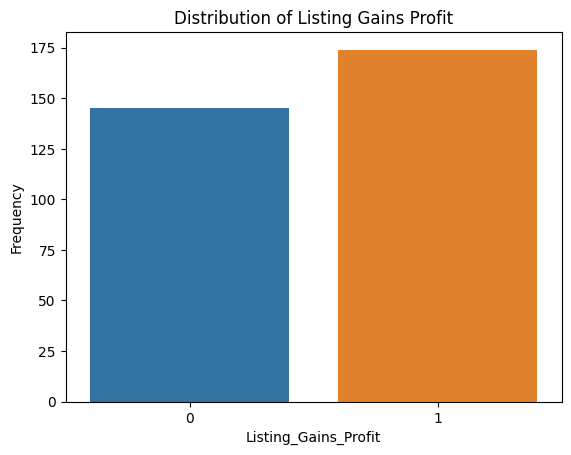

In [11]:
sns.countplot(data=df, x='Listing_Gains_Profit')
plt.title('Distribution of Listing Gains Profit')
plt.ylabel("Frequency")           
plt.show()

### Distribution of Predictor Variables

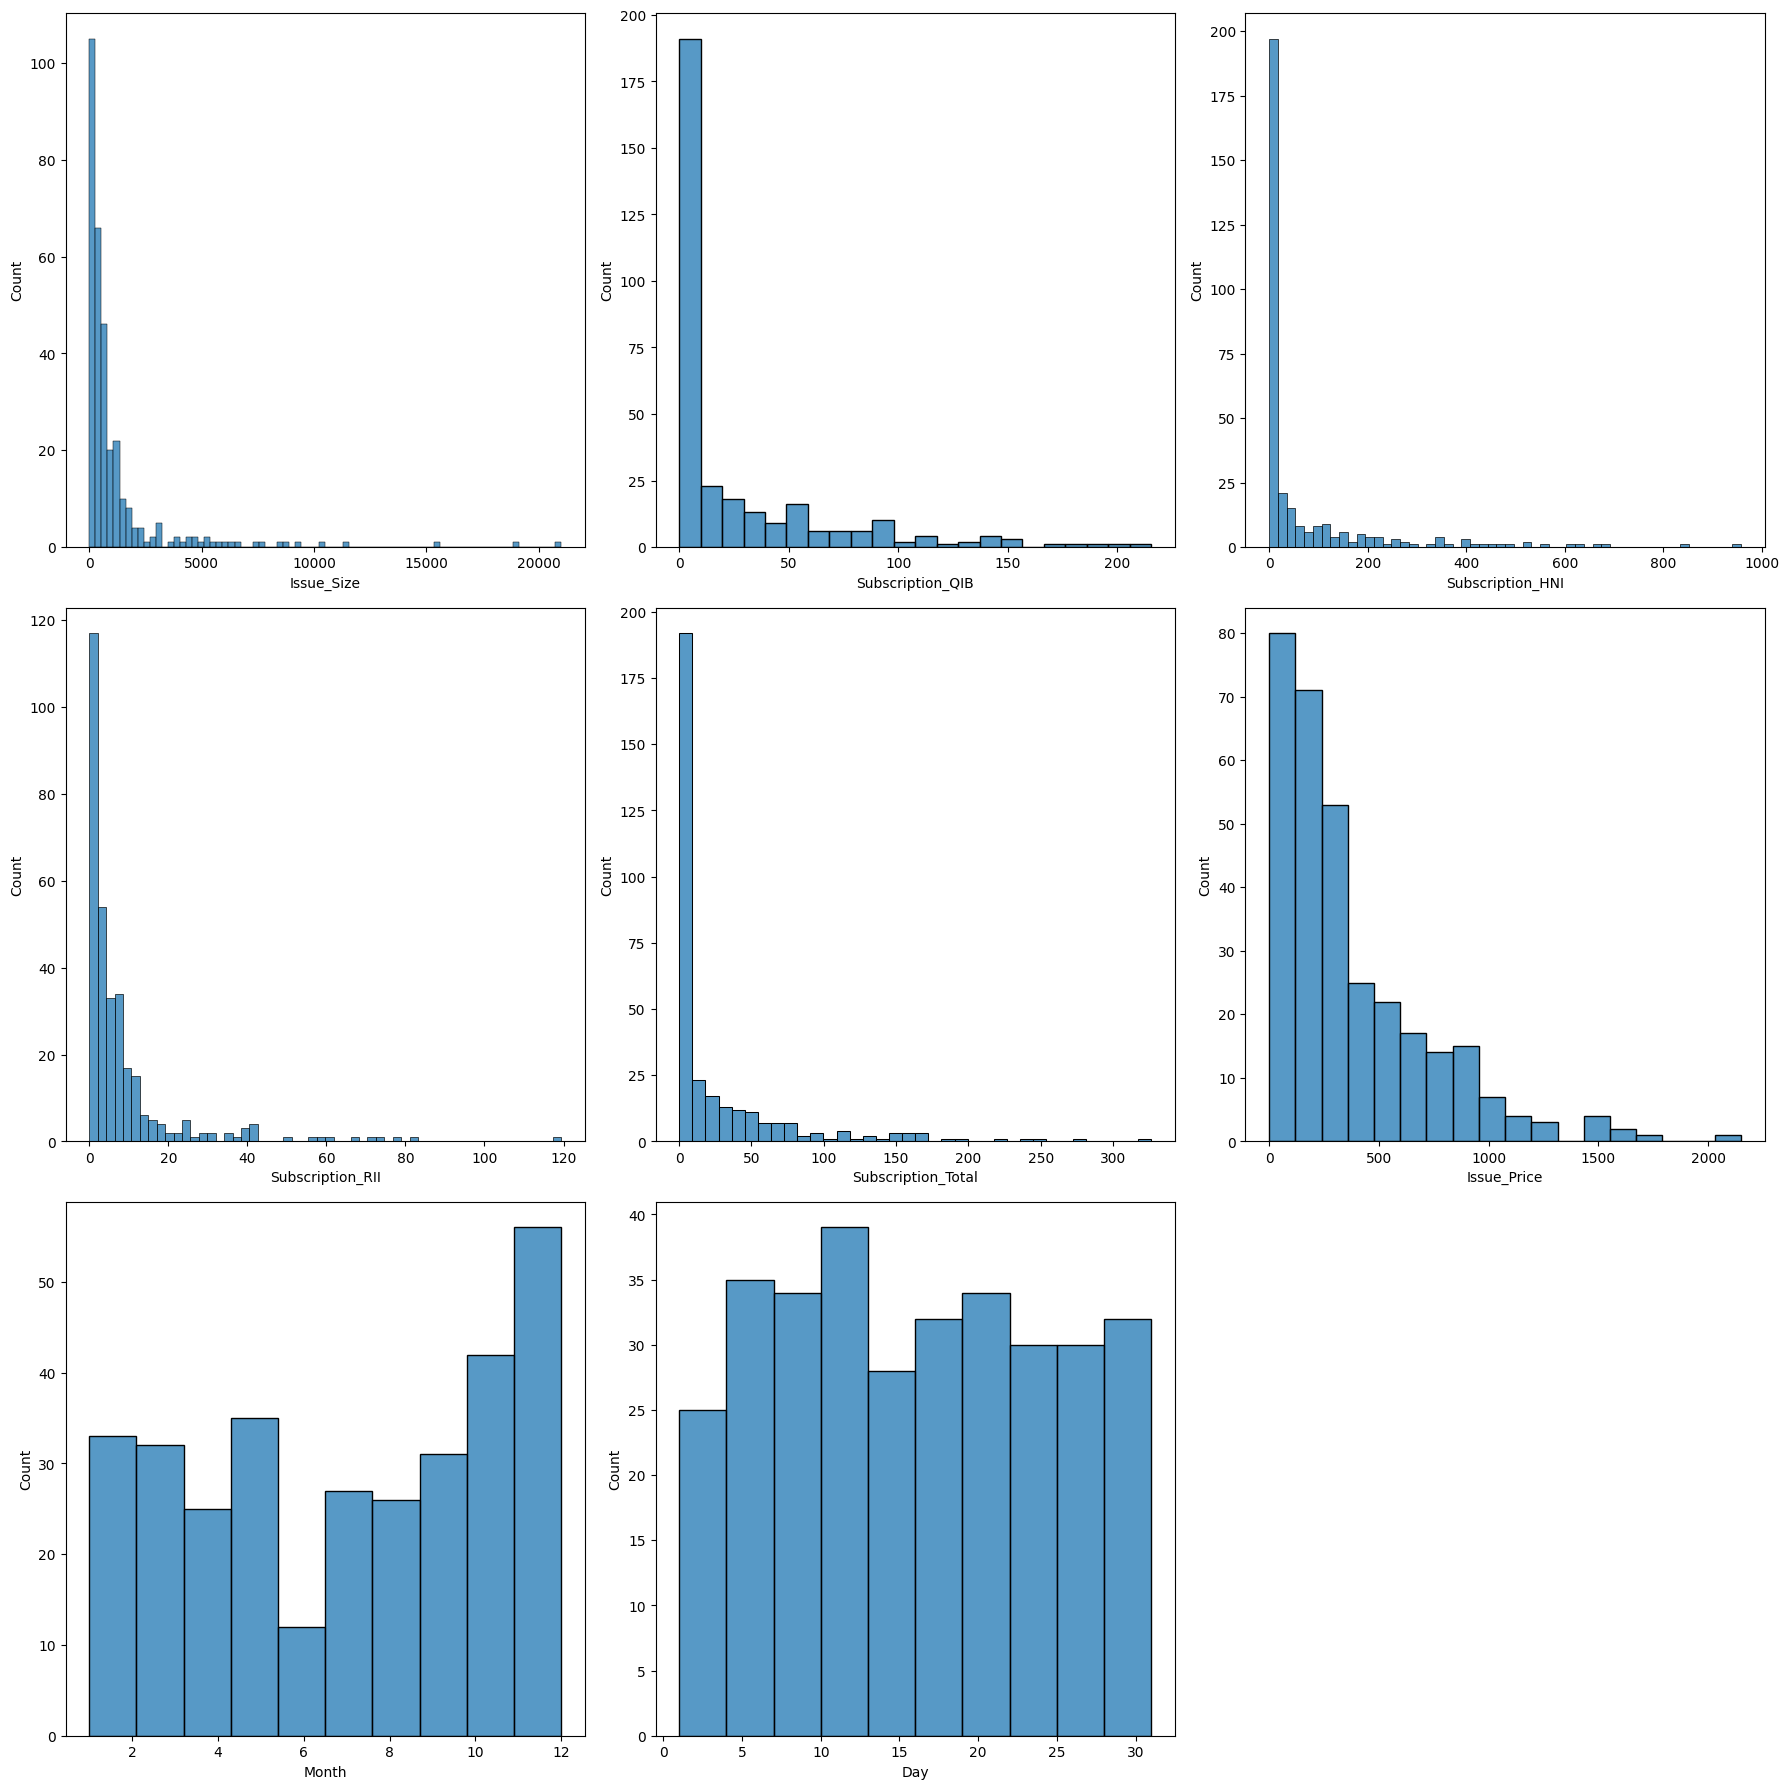

In [12]:
X_columns = df.drop('Listing_Gains_Profit', axis=1).columns

plt.figure(figsize=(18, 18))
for i, f in enumerate(X_columns, start=1):
    plt.subplot(3, 3, i)
    sns.histplot(df[f])
    
plt.tight_layout()
plt.show()

Findings:
- `Issue_Size`: right-skewed distribution with most values concentrated at lower ranges, and only a few IPOs have significantly higher issue sizes.
- `Subscription_XXX`:
    - all are right-skewed distribution with a long tail
    - `XXX_HNI` has wider range
    - most IPOs have low overall subscription rates, with a few IPOs experiencing extreme oversubscription
- `Issue_Price` - right-skewed distribution but not that preciptous as the issue size and subscription rate, looked lesser outliers than them.
- `Month` - more evenly spread, but some months (possibly end of the year) have more IPO activity and less in Jun, suggesting seasonality in IPO launches.
- `Day` - seem to be evenly spread across different days, and no strong indication of a preferred day

### Predictor vs Target

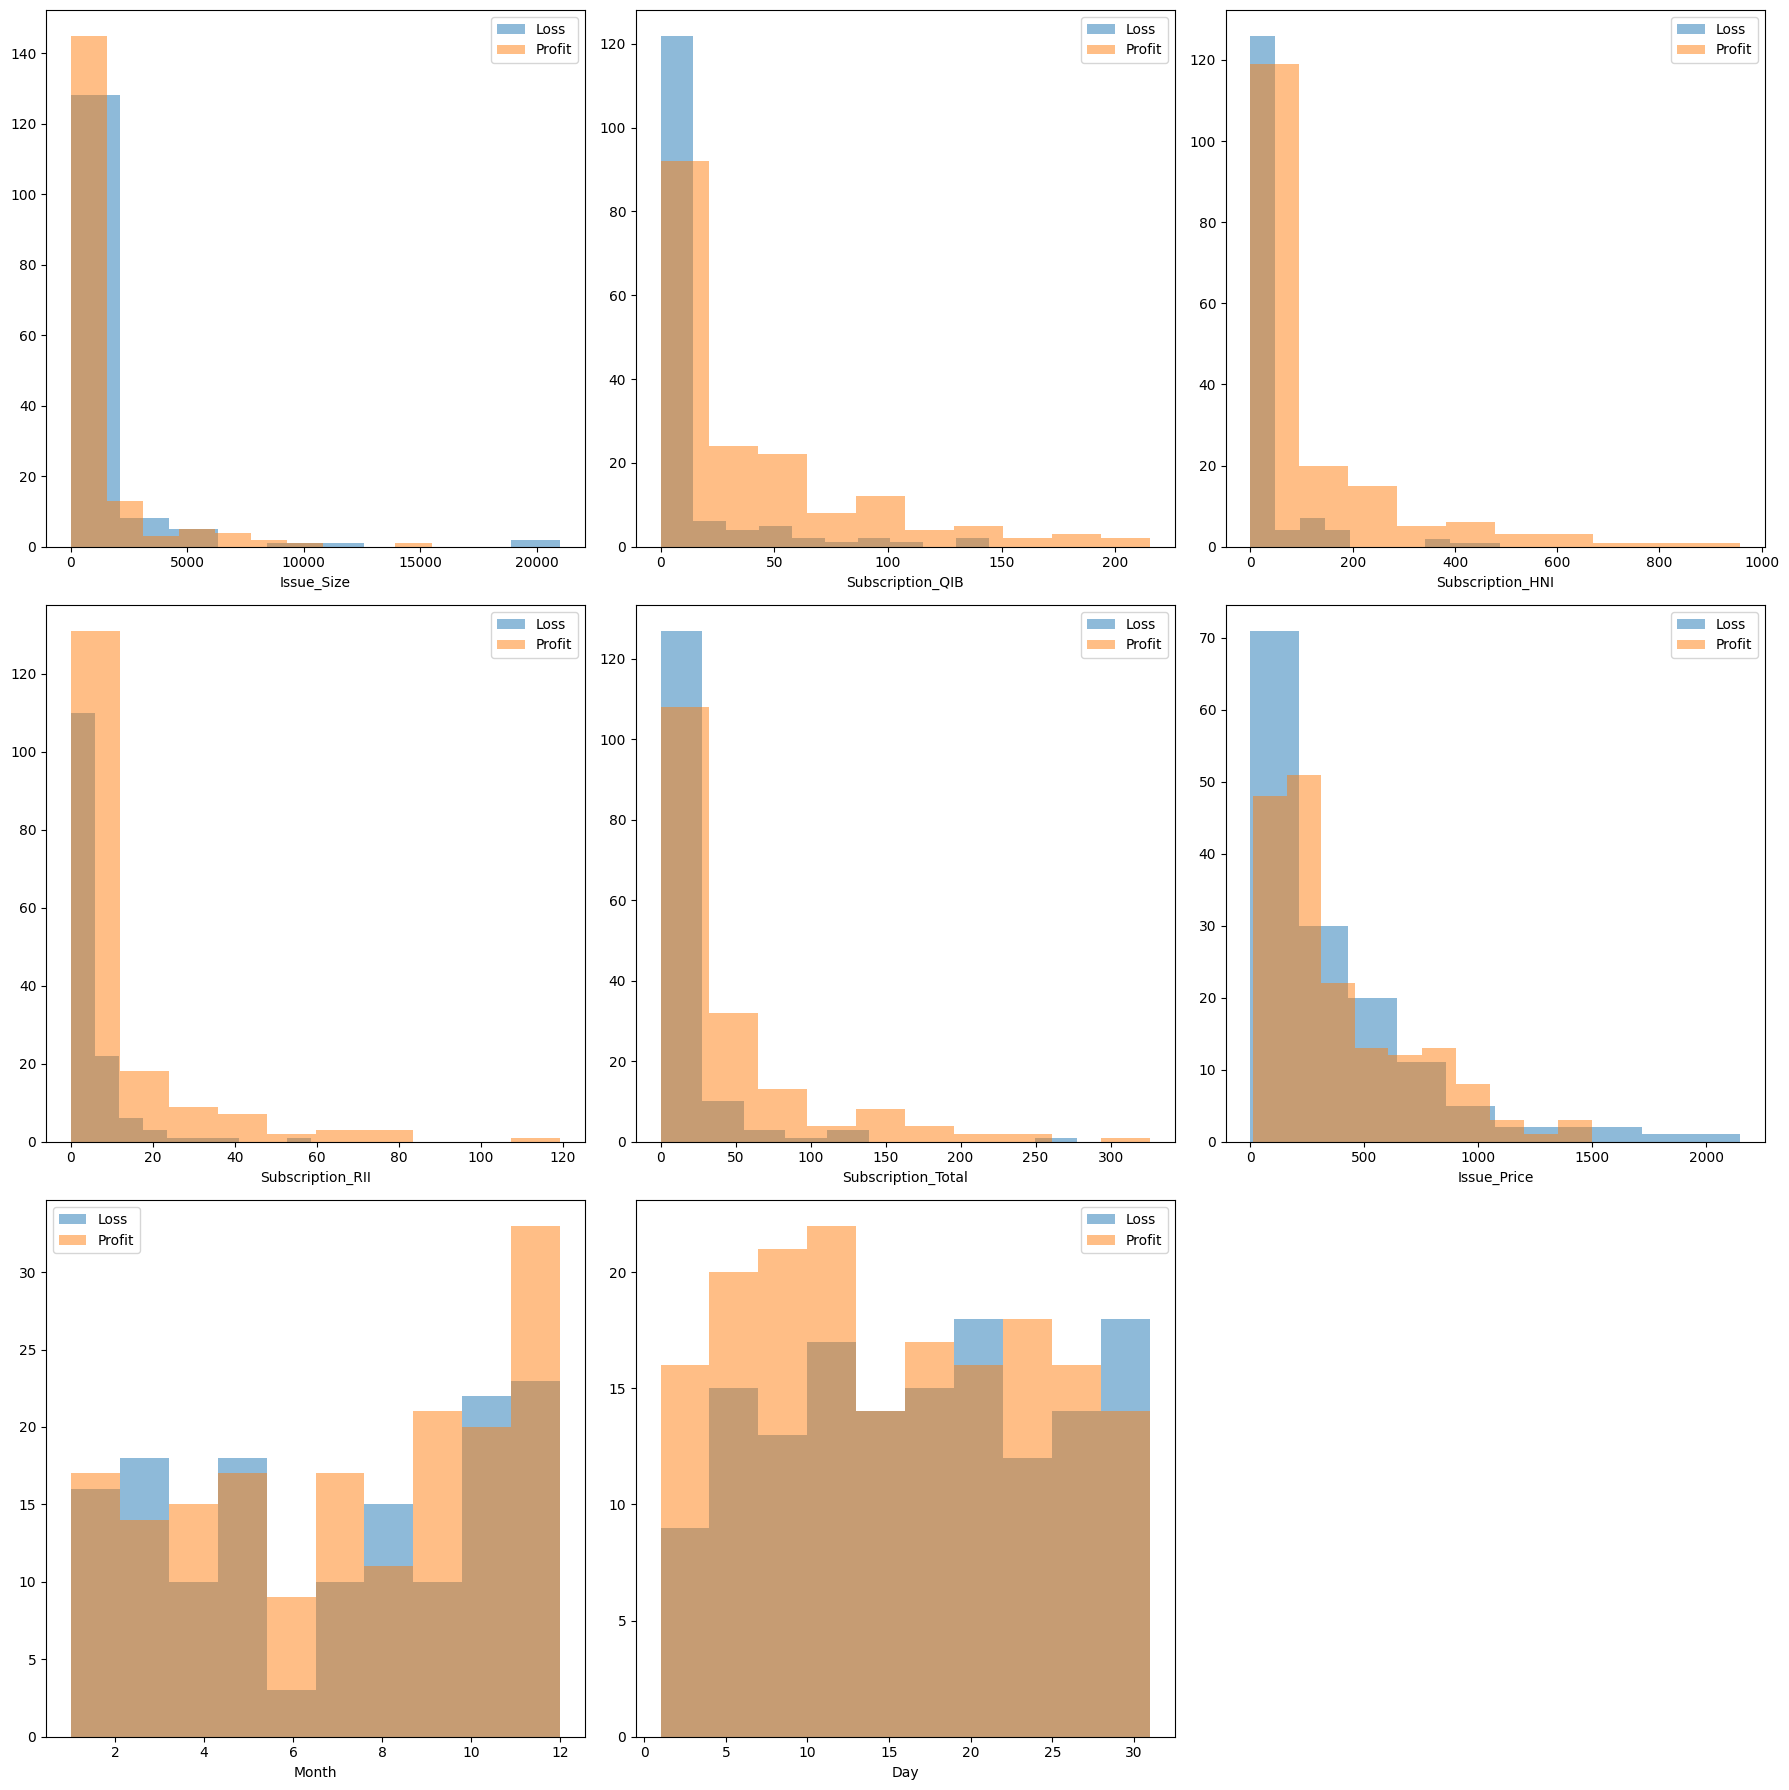

In [13]:
plt.figure(figsize=(18, 18))
for i, f in enumerate(X_columns, start=1):
    loss = df[df['Listing_Gains_Profit'] == 0]
    profit = df[df['Listing_Gains_Profit'] == 1]
    
    plt.subplot(3, 3, i)
    plt.hist(loss[f], bins=10, alpha=0.5, label='Loss')
    plt.hist(profit[f], bins=10, alpha=0.5, label='Profit')
    plt.xlabel(f)
    plt.legend()
    
plt.tight_layout()
plt.show()

Findings:
- The "Profit" category (orange) generally has higher values in all the different type of **subscription rate**, indicating that IPOs with high demand (more subscriptions) are more likely to be profitable.
- The "Loss" category (blue) has more count on the higher values for the **issue size** and **issue price**.
- **Month** & **Day** have no strong visible pattern for the grouping.

### Pearson's correlation

<AxesSubplot: >

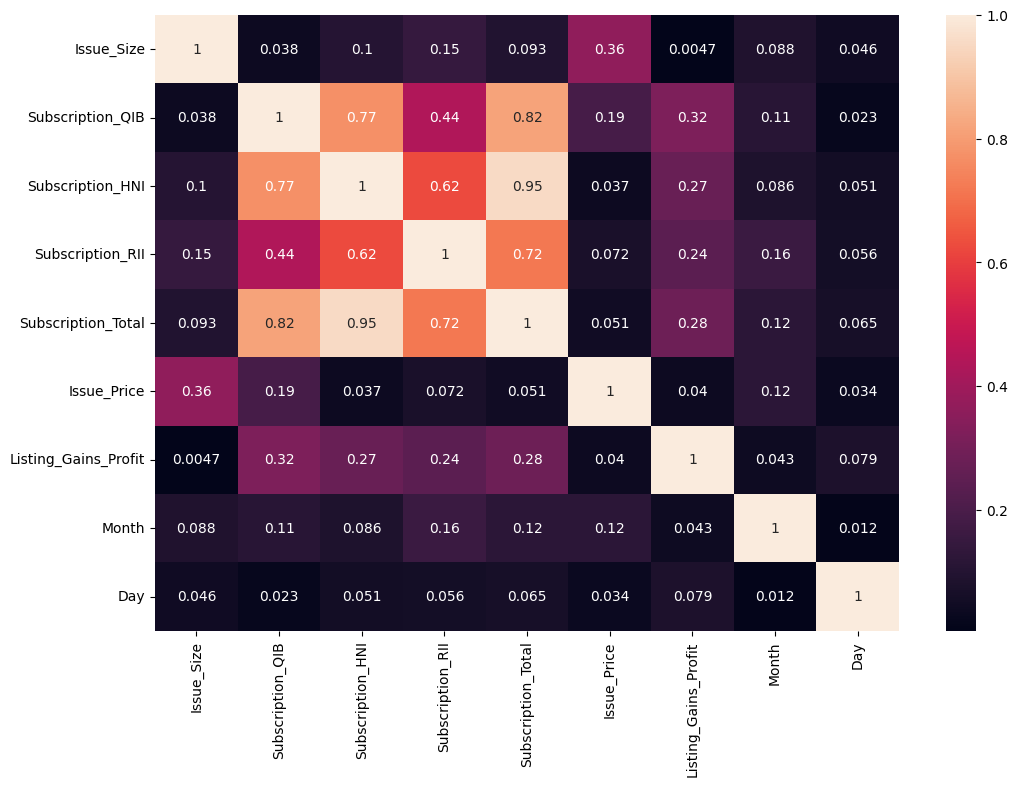

In [14]:
corr_dataset = abs(df.corr().round(4))

plt.figure(figsize=(12, 8))
sns.heatmap(corr_dataset, annot=True)

In [15]:
# extract the value to the target variable with sorting
print(corr_dataset['Listing_Gains_Profit'].sort_values(ascending=False))

Listing_Gains_Profit    1.0000
Subscription_QIB        0.3235
Subscription_Total      0.2833
Subscription_HNI        0.2719
Subscription_RII        0.2408
Day                     0.0787
Month                   0.0434
Issue_Price             0.0395
Issue_Size              0.0047
Name: Listing_Gains_Profit, dtype: float64


In [16]:
# extract the combinations that have high correlation value (>0.35)
mask = (corr_dataset > 0.35) & (corr_dataset != 1)

# Stack the masked DataFrame and reset the index
filtered = mask.stack().reset_index()

# Filter only rows where the condition is True
filtered_combinations = filtered[filtered[0]]

# Rename columns for clarity
filtered_combinations.columns = ['row', 'col', 'mask_value']

filtered_combinations = filtered_combinations.copy()  # Ensure you're working on a copy
filtered_combinations.loc[:, 'value'] = filtered_combinations.apply(
    lambda x: corr_dataset.loc[x['row'], x['col']], axis=1
)

# Remove duplicate pairs by ensuring the smaller name comes first
filtered_combinations = filtered_combinations[filtered_combinations['row'] < filtered_combinations['col']]

# Drop the "mask_value" column if no longer needed
filtered_combinations = filtered_combinations.drop(columns=['mask_value'])

print(filtered_combinations.sort_values(by='value', ascending=False))

                 row                 col   value
22  Subscription_HNI  Subscription_Total  0.9548
13  Subscription_QIB  Subscription_Total  0.8158
19  Subscription_HNI    Subscription_QIB  0.7739
31  Subscription_RII  Subscription_Total  0.7187
21  Subscription_HNI    Subscription_RII  0.6230
12  Subscription_QIB    Subscription_RII  0.4375
45       Issue_Price          Issue_Size  0.3647


For the correlation value to the target variable:
- All the 4 types of subscription rates have the relatively high correlation (from 0.24 to 0.32)
- Rest 4 predictor variables have correlation value less than 0.08, the issue size even has only 0.005

For the correlation value between the predictor variable:
- Not suprising, each type of the subscription rate has strong correlation with each other
- Other than the subscription rate, only the issue price and issue size relatively high correlation with value 0.3647

## Outliers

Since non of the variables is with normal distribution, we'll use `IQR` method to check the outliers

In [17]:
# create an empty list to store all the outliers' index
outliers_index = []

for i in X_columns:
    series = df[i]

    ## IQR 
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    iqr_outliers = series[(series < lower_bound) | (series > upper_bound)]
    
    outliers_index.append(list(iqr_outliers.index))
    
    ## Print Results
    print(f"{series.name}:")
    print(f"- Observations: {len(iqr_outliers)}")
    print(f"- percentage (%): {len(iqr_outliers)/len(series)*100:.2f}%")
    print("\n")

Issue_Size:
- Observations: 34
- percentage (%): 10.66%


Subscription_QIB:
- Observations: 35
- percentage (%): 10.97%


Subscription_HNI:
- Observations: 48
- percentage (%): 15.05%


Subscription_RII:
- Observations: 33
- percentage (%): 10.34%


Subscription_Total:
- Observations: 31
- percentage (%): 9.72%


Issue_Price:
- Observations: 12
- percentage (%): 3.76%


Month:
- Observations: 0
- percentage (%): 0.00%


Day:
- Observations: 0
- percentage (%): 0.00%




As expected, the issue size and the subscription rates have more than 10% outliers, while `Issue_Price` has only 3.8% and both `Month` and `Day` have no outliers.

In [18]:
unique_outliers_index = list(sorted(set(i for j in outliers_index for i in j)))
len(unique_outliers_index)

106

After combining the outliers from all the features, we have 106 unique lines, which is about 33% of our data. Lets also use the `skew()` method to check how skewned the features are.

In [19]:
for i in X_columns:
    print(f"{i} - {round(df[i].skew(), 4)}")

Issue_Size - 4.8534
Subscription_QIB - 2.1437
Subscription_HNI - 3.0784
Subscription_RII - 3.7083
Subscription_Total - 2.9119
Issue_Price - 1.6969
Month - -0.111
Day - 0.064


This is critical and we need to do something!

### Treatment

Removing 33% of the data would significantly reduce the sample size, which could negatively impact model performance, so we'll try to use the `clip()` method to assign the values outside boundary to boundary values with the `lower_bound` and the `upper_bound`.

In [20]:
# copy to a new df instead of modfying the original df
new_df = df.copy()

for i in X_columns:
    series = new_df[i]

    ## IQR 
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    new_df[i] = new_df[i].clip(lower_bound, upper_bound)

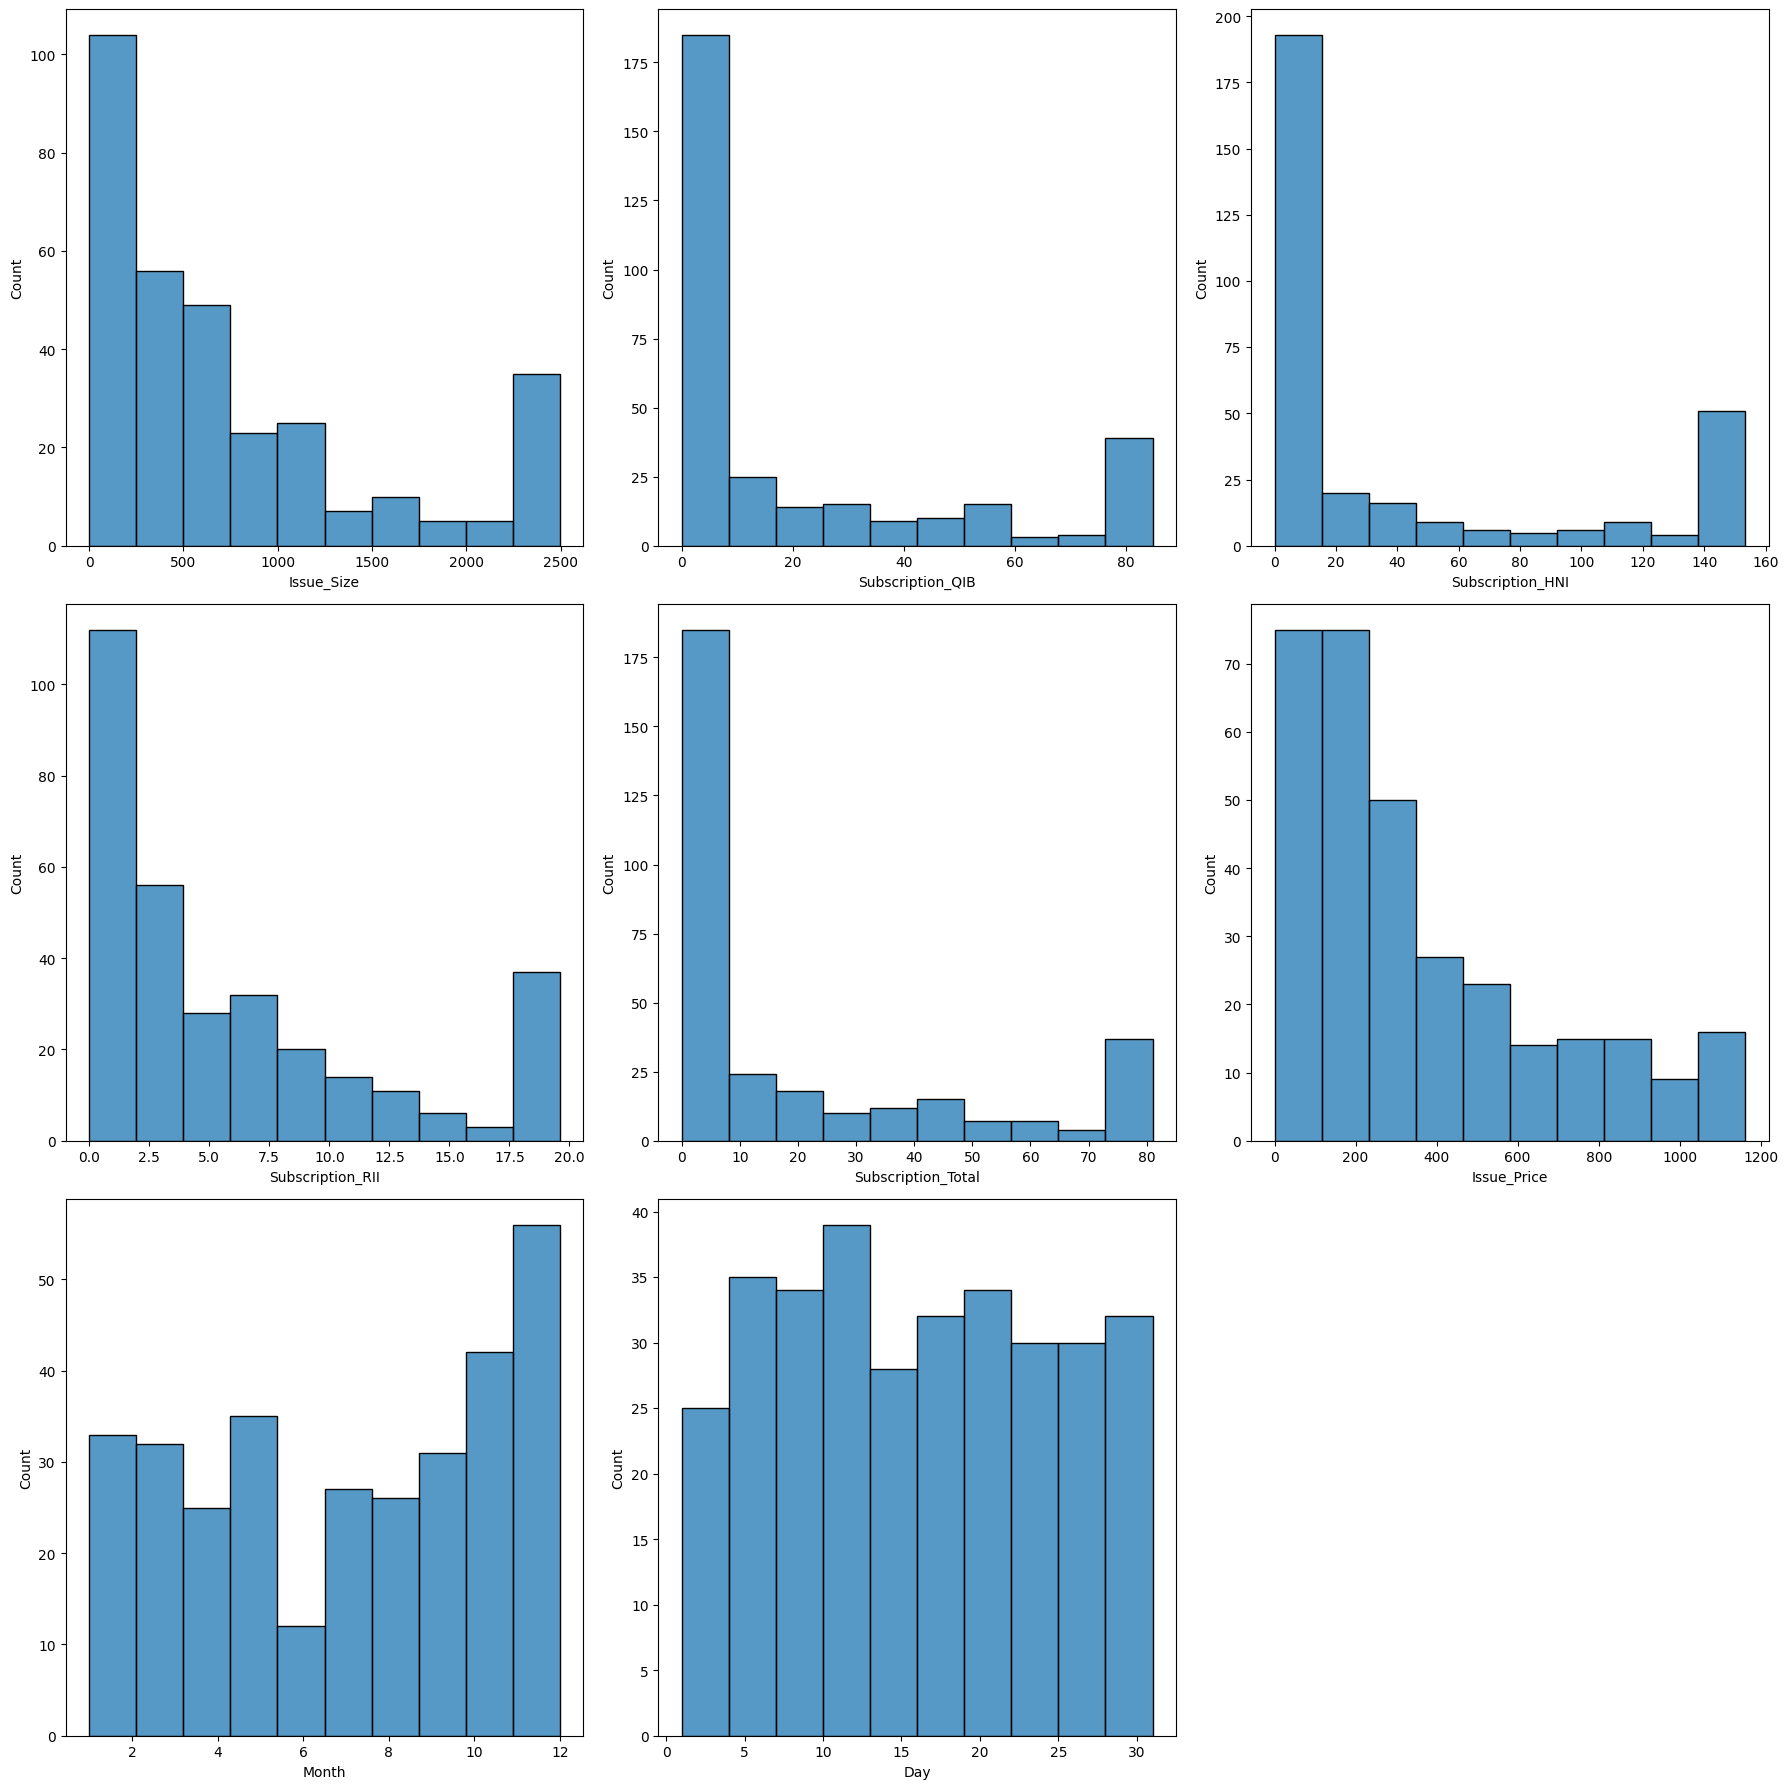

In [21]:
new_df_to_check = new_df.drop('Listing_Gains_Profit', axis=1).columns

plt.figure(figsize=(18, 18))
for i, f in enumerate(new_df_to_check, start=1):
    plt.subplot(3, 3, i)
    sns.histplot(new_df[f])
    
plt.tight_layout()
plt.show()

Now all the outliers are remoed, but we can see that most of the graphs above have a "abrupt" at the upper bound, right-skewed distribution should have lower frequency as the value increace, but they have higher count for the maximum value. We're not sure yet how this will impact the modeling, but it looked like not a good approach to handle the outliers.

We have another option - log transformation - which can reduce the skewness. We'll skip `Month` and `Day` as they arent skewed distributed and dont have wide value range.

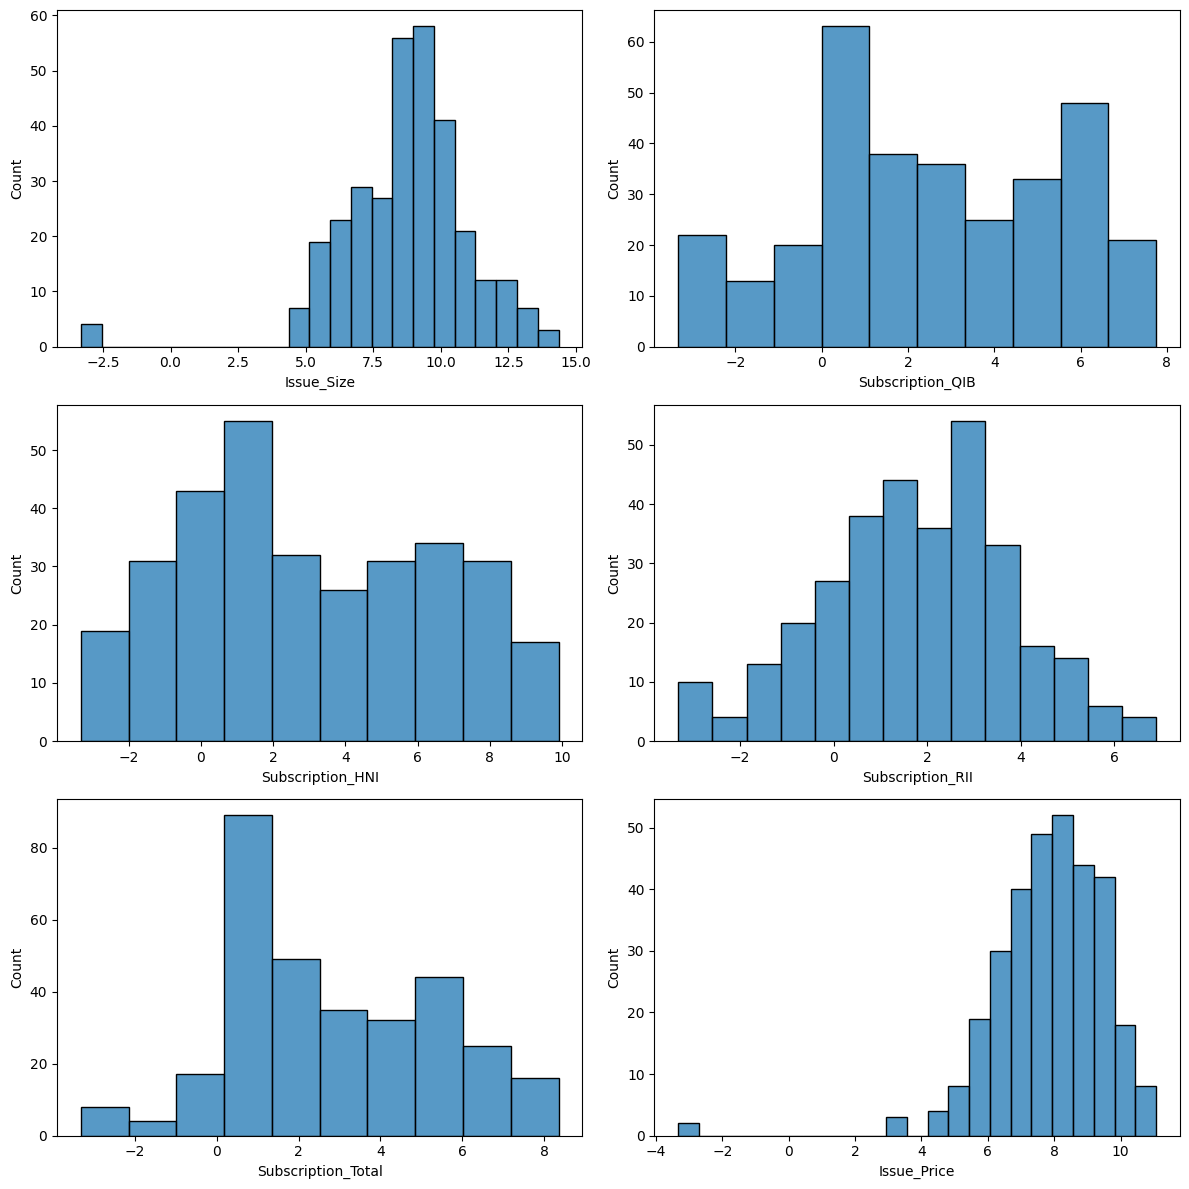

In [22]:
to_log = df.drop(['Listing_Gains_Profit', 'Month', 'Day'], axis=1).columns

plt.figure(figsize=(12, 12))
for i, f in enumerate(to_log, start=1):
    plt.subplot(3, 2, i)
    sns.histplot(np.log2(df[f]+0.1))
    
plt.tight_layout()
plt.show()

Looks fine, lets now transform those predictors to a new dataframe `log_df` and check for their outliers

In [23]:
log_df = df.copy()
new_col = []

for i in to_log:
    new_name = f"log_{i}"
    log_df[new_name] = np.log(log_df[i]+0.1)
    log_df.drop(i, axis=1, inplace=True)
    new_col.append(new_name)
    
# create an empty list to store all the outliers' index
outliers_index = []

for i in new_col:
    series = log_df[i]

    ## IQR 
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    iqr_outliers = series[(series < lower_bound) | (series > upper_bound)]
    
    outliers_index.append(list(iqr_outliers.index))
    
    ## Print Results
    print(f"{series.name}:")
    print(f"- Observations: {len(iqr_outliers)}")
    print(f"- percentage (%): {len(iqr_outliers)/len(series)*100:.2f}%")
    print("\n")

log_Issue_Size:
- Observations: 6
- percentage (%): 1.88%


log_Subscription_QIB:
- Observations: 0
- percentage (%): 0.00%


log_Subscription_HNI:
- Observations: 0
- percentage (%): 0.00%


log_Subscription_RII:
- Observations: 0
- percentage (%): 0.00%


log_Subscription_Total:
- Observations: 0
- percentage (%): 0.00%


log_Issue_Price:
- Observations: 5
- percentage (%): 1.57%




In [24]:
unique_outliers_index = list(sorted(set(i for j in outliers_index for i in j)))
len(unique_outliers_index)

10

In [25]:
for i in new_col:
    print(f"{i} - {round(log_df[i].skew(), 4)}")

log_Issue_Size - -1.4132
log_Subscription_QIB - -0.1467
log_Subscription_HNI - 0.1439
log_Subscription_RII - -0.1915
log_Subscription_Total - 0.135
log_Issue_Price - -1.9192


- After the log transformation, only 3 predictors have outliers with 11 observations in total, it's safe to remove them
- With the `skew()` value, the `log_Issue_Price` is moderately skewed and the rest predictors are fairly symmetric with no significant skew

In [26]:
# proper indexing
index_to_remove = log_df.iloc[unique_outliers_index].index

# remove outliers
log_df.drop(index_to_remove, axis=0, inplace=True)
log_df

,Listing_Gains_Profit,Month,Day,log_Issue_Size,log_Subscription_QIB,log_Subscription_HNI,log_Subscription_RII,log_Subscription_Total,log_Issue_Price
0,1,2,3,5.246498,3.882388,4.664571,2.414126,3.768614,5.106551
1,0,2,8,5.795450,4.085808,3.952205,1.358409,3.440739,4.977423
2,1,2,15,4.031582,0.086178,2.815409,1.848455,1.662030,4.318821
3,0,2,15,5.297817,0.198851,1.321756,-0.328504,0.277632,5.106551
5,0,2,23,5.011302,-1.021651,1.642873,1.131402,0.712950,5.394082
...,...,...,...,...,...,...,...,...,...
314,1,8,26,6.733676,3.749975,1.978239,1.078410,2.753024,5.394082
315,1,9,6,6.331858,3.317091,2.658860,3.190065,3.150597,5.787204
316,0,9,15,6.674688,-0.494296,0.625938,1.264127,0.398776,6.263589
317,1,9,26,6.626850,4.735496,3.700314,2.528924,3.856299,5.799396


### log_predictors vs Target

Lets take a look on the predictors' distribution vs target variable after the log transformation and outliers treatment

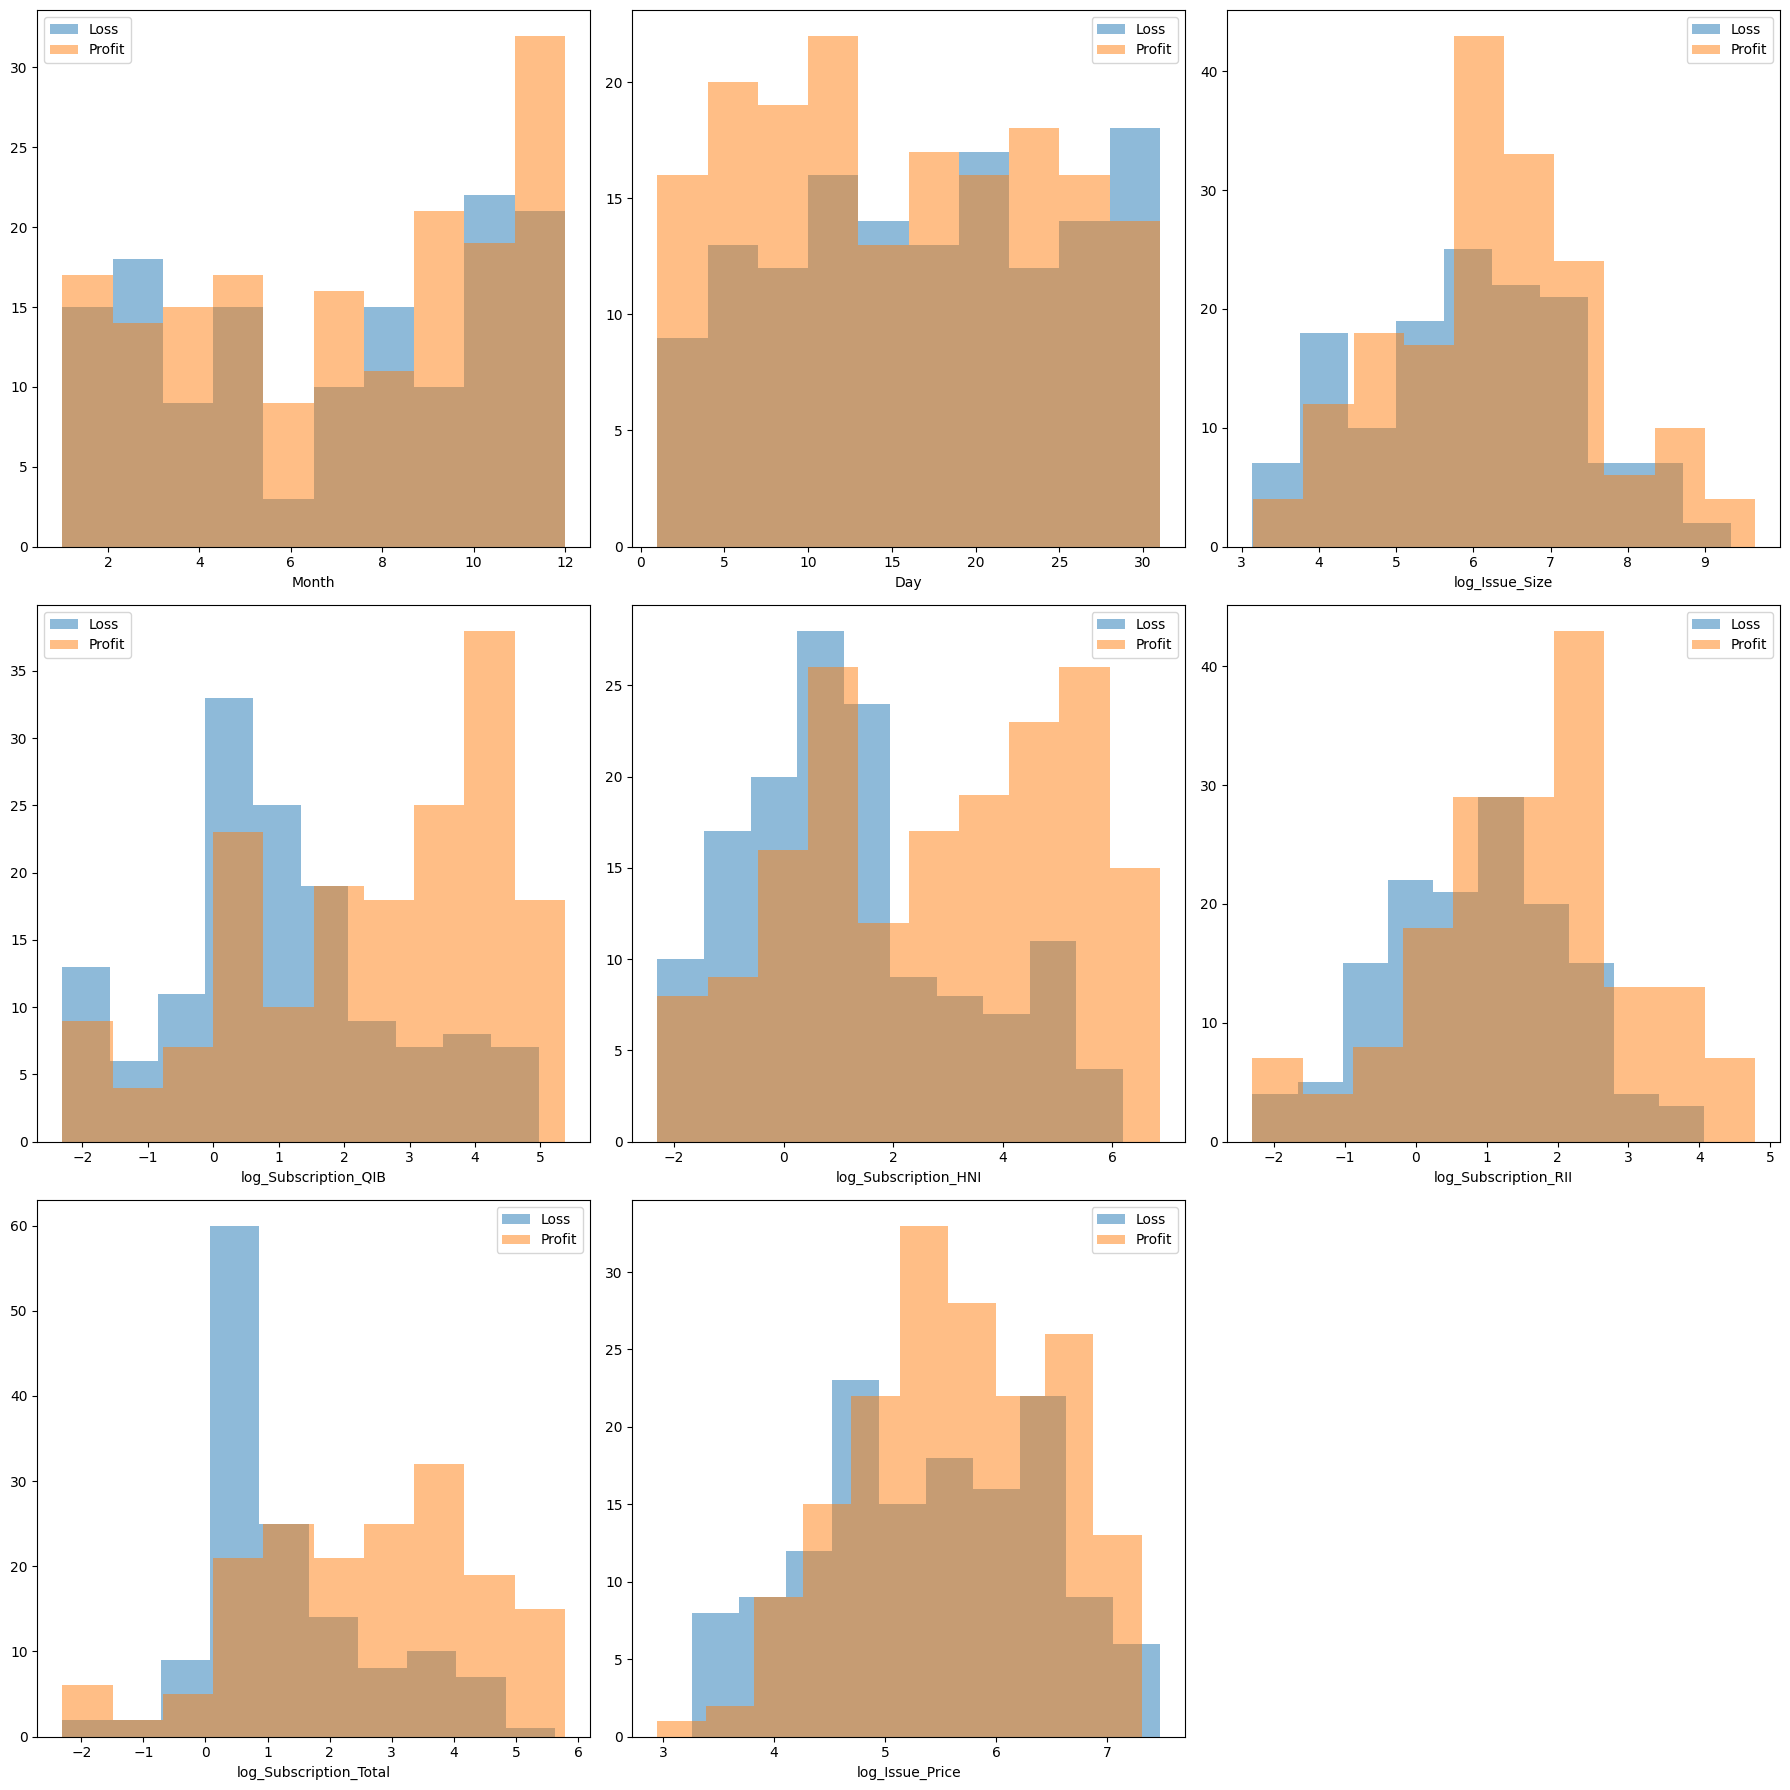

In [27]:
X_columns = log_df.drop('Listing_Gains_Profit', axis=1).columns

plt.figure(figsize=(18, 18))
for i, f in enumerate(X_columns, start=1):
    loss = log_df[log_df['Listing_Gains_Profit'] == 0]
    profit = log_df[log_df['Listing_Gains_Profit'] == 1]
    
    plt.subplot(3, 3, i)
    plt.hist(loss[f], bins=10, alpha=0.5, label='Loss')
    plt.hist(profit[f], bins=10, alpha=0.5, label='Profit')
    plt.xlabel(f)
    plt.legend()
    
plt.tight_layout()
plt.show()

## X and y

Although we had transformed those skewed predictors, but it’s highly recommended to normalize the predictor variables for a neural network model, as it perform best when inputs are scaled to a similar range.

In [28]:
y = log_df['Listing_Gains_Profit']
X = log_df.drop('Listing_Gains_Profit', axis=1)

X_columns = X.columns
X[X_columns] = X[X_columns]/X[X_columns].max()
X.describe()

,Month,Day,log_Issue_Size,log_Subscription_QIB,log_Subscription_HNI,log_Subscription_RII,log_Subscription_Total,log_Issue_Price
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,0.586300,0.506838,0.634734,0.325708,0.305310,0.259691,0.340427,0.737582
std,0.277306,0.278742,0.139948,0.380101,0.348402,0.301310,0.304843,0.129032
min,0.083333,0.032258,0.325473,-0.428532,-0.335408,-0.481345,-0.397772,0.394526
25%,0.333333,0.290323,0.539004,0.041529,0.049013,0.073303,0.101540,0.645903
50%,0.583333,0.516129,0.644223,0.312470,0.239592,0.265438,0.284474,0.741730
75%,0.833333,0.741935,0.725942,0.665785,0.601722,0.453669,0.606672,0.841782
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Modeling

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=369)

print(f"original:\n{y.value_counts()}\n")
print(f"train:\n{y_train.value_counts()}\n")
print(f"test:\n{y_test.value_counts()}")

original:
1    171
0    138
Name: Listing_Gains_Profit, dtype: int64

train:
1    139
0    108
Name: Listing_Gains_Profit, dtype: int64

test:
1    32
0    30
Name: Listing_Gains_Profit, dtype: int64


### Defining the Model

In [30]:
model = tf.keras.Sequential()

# input layer
model.add(tf.keras.layers.Dense(32, input_shape = (X_train.shape[1],), activation = 'relu'))

# hidden layer
model.add(tf.keras.layers.Dense(16, activation= 'relu'))
model.add(tf.keras.layers.Dense(8, activation= 'relu'))
model.add(tf.keras.layers.Dense(4, activation= 'relu'))

# output layer
model.add(tf.keras.layers.Dense(1, activation='sigmoid')) # sigmoid for binary classification

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                288       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 4)                 36        
                                                                 
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
Total params: 993
Trainable params: 993
Non-trainable params: 0
_________________________________________________________________


### Compile and Train the model

In [32]:
optimizer=tf.keras.optimizers.Adam(0.001)
loss=tf.keras.losses.BinaryCrossentropy()
metrics=['accuracy']

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

model.fit(X_train, y_train, epochs=150)

Epoch 1/150
8/8 [==============================] - 1s 2ms/step - loss: 0.6879 - accuracy: 0.5628
Epoch 2/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6782 - accuracy: 0.5628
Epoch 3/150
8/8 [==============================] - 0s 2ms/step - loss: 0.6708 - accuracy: 0.5628
Epoch 4/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6646 - accuracy: 0.5628
Epoch 5/150
8/8 [==============================] - 0s 11ms/step - loss: 0.6578 - accuracy: 0.5628
Epoch 6/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6517 - accuracy: 0.5668
Epoch 7/150
8/8 [==============================] - 0s 12ms/step - loss: 0.6461 - accuracy: 0.5749
Epoch 8/150
8/8 [==============================] - 0s 2ms/step - loss: 0.6405 - accuracy: 0.5870
Epoch 9/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6356 - accuracy: 0.6073
Epoch 10/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6305 - accuracy: 0.6275
Epoch 11/150
8/8 [=========

### Model Evaluation

In [33]:
model.evaluate(X_train, y_train)

8/8 [==============================] - 0s 1ms/step - loss: 0.4726 - accuracy: 0.7571


[0.4726390838623047, 0.7570850253105164]

In [34]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.7346 - accuracy: 0.6613


[0.7346163988113403, 0.6612903475761414]

The accuracy is about 76% on the training data and 66% on the test data, indicating a overfitting where the model performing much better on the training data.

### Retraining the model

The model we had is underffting the unseen data. Next, lets try to remove the `Month` and `Day` predictors which have the low correlation with the target variable.

In [35]:
X = X.drop(['Month', 'Day'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=369)

model = tf.keras.Sequential()

# input layer
model.add(tf.keras.layers.Dense(32, input_shape = (X_train.shape[1],), activation = 'relu'))

# hidden layer
model.add(tf.keras.layers.Dense(16, activation= 'relu'))
model.add(tf.keras.layers.Dense(8, activation= 'relu'))
model.add(tf.keras.layers.Dense(4, activation= 'relu'))

# output layer
model.add(tf.keras.layers.Dense(1, activation='sigmoid')) # sigmoid for binary classification

optimizer=tf.keras.optimizers.Adam(0.001)
loss=tf.keras.losses.BinaryCrossentropy()
metrics=['accuracy']

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

model.fit(X_train, y_train, epochs=150)

Epoch 1/150
8/8 [==============================] - 1s 2ms/step - loss: 0.6918 - accuracy: 0.6397
Epoch 2/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6895 - accuracy: 0.6599
Epoch 3/150
8/8 [==============================] - 0s 11ms/step - loss: 0.6879 - accuracy: 0.6680
Epoch 4/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6865 - accuracy: 0.6680
Epoch 5/150
8/8 [==============================] - 0s 12ms/step - loss: 0.6844 - accuracy: 0.6761
Epoch 6/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6832 - accuracy: 0.6721
Epoch 7/150
8/8 [==============================] - 0s 11ms/step - loss: 0.6810 - accuracy: 0.6640
Epoch 8/150
8/8 [==============================] - 0s 2ms/step - loss: 0.6793 - accuracy: 0.6640
Epoch 9/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6786 - accuracy: 0.6640
Epoch 10/150
8/8 [==============================] - 0s 2ms/step - loss: 0.6764 - accuracy: 0.6640
Epoch 11/150
8/8 [========

In [36]:
model.evaluate(X_train, y_train)

8/8 [==============================] - 0s 1ms/step - loss: 0.5339 - accuracy: 0.7571


[0.5338870882987976, 0.7570850253105164]

In [37]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 3ms/step - loss: 0.6249 - accuracy: 0.7258


[0.6249321699142456, 0.725806474685669]

It's better now, where the accuracy doesn't drop too much when we test the model on unseen data, although a 70+% accurancy is not considered as a good model.

## Moving Forward

- Hyperparameter Optimization: tuning the hyperparameters like learning rate, number of layers, etc., is important for finding the optimal configuration of the deep learning model. Try to tune the hyperparameters and examine the changes in the model accuracy.
- Optimizers and Loss Functions: you can use different optimizers and loss functions to see which one improves the model performance.
- Features: instead of using the base predictors in the data, try to construct new features that might help improve the model's predictive ability.
- Performance Metrics: instead of using accuracy as the performance metric, you may try other performance metrics to see if that helps guide the model toward better results.
- Domain Specific Knowledge: using domain specific knowledge to adjust your model can further enhance its performance and accuracy.